In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/content/titanic.csv')


In [21]:

print(df.columns)

target_column = 'survived' # Assuming the column name is 'survived' based on the context

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_column, errors='ignore')
categorical_features = df.select_dtypes(include=['object']).columns.drop(target_column, errors='ignore')


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and transform the training data, transform the testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Preprocessing complete. Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Preprocessing complete. Data split into training and testing sets.
Shape of X_train: (712, 28)
Shape of X_test: (179, 28)
Shape of y_train: (712,)
Shape of y_test: (179,)


SVM Confusion Matrix:
 [[95 15]
 [51 18]]
SVM Accuracy: 0.6312849162011173


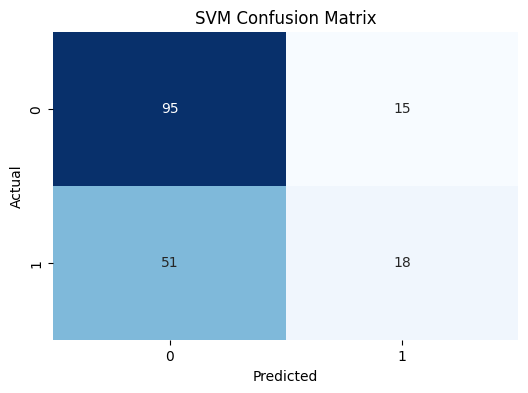

In [27]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# 2. Initialize and train a Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 3. Make predictions on X_test using the trained SVM model
svm_predictions = svm_model.predict(X_test)

# 4. Calculate the confusion matrix and accuracy score for the SVM model
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("SVM Accuracy:", svm_accuracy)
plot_confusion_matrix(svm_conf_matrix, 'SVM')

**Reasoning**:
Initialize and train a Gaussian Naïve Bayes model, make predictions, and calculate its confusion matrix and accuracy.




Gaussian Naïve Bayes Confusion Matrix:
 [[110   0]
 [  0  69]]
Gaussian Naïve Bayes Accuracy: 1.0


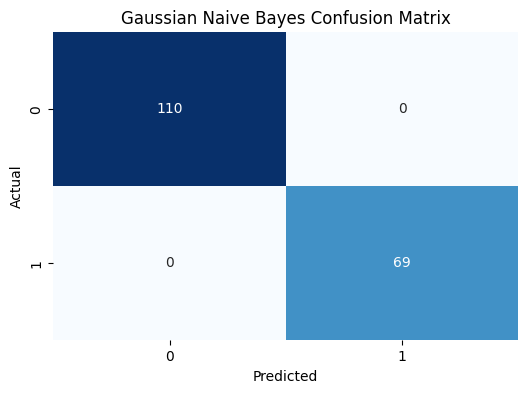

In [28]:
# 5. Initialize and train a Gaussian Naïve Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train) # X_train is already a NumPy array

# 6. Make predictions on X_test using the trained Gaussian Naïve Bayes model
gnb_predictions = gnb_model.predict(X_test) # X_test is already a NumPy array

# 7. Calculate the confusion matrix and accuracy score for the Gaussian Naïve Bayes model
gnb_conf_matrix = confusion_matrix(y_test, gnb_predictions)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

print("\nGaussian Naïve Bayes Confusion Matrix:\n", gnb_conf_matrix)
print("Gaussian Naïve Bayes Accuracy:", gnb_accuracy)
plot_confusion_matrix(gnb_conf_matrix, 'Gaussian Naive Bayes')



Cluster 0 maps to survival class: 0
Cluster 1 maps to survival class: 1

K-Means Confusion Matrix:
 [[106   4]
 [ 63   6]]
K-Means Accuracy: 0.6256983240223464


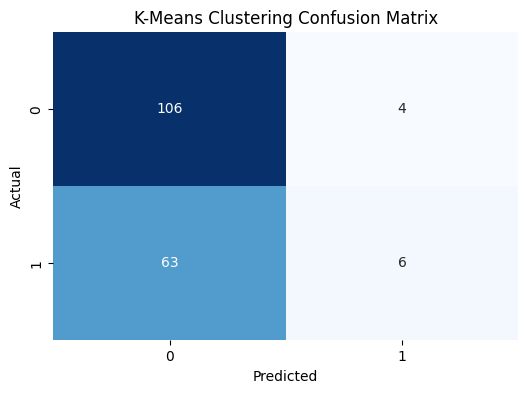

In [29]:
# 8. Initialize and train a K-Means Clustering model
# We set n_clusters to 2 since there are two survival outcomes (0 and 1)
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10) # Explicitly set n_init
kmeans_model.fit(X_train)

# Map clusters to survival labels
# Find the majority class within each cluster
cluster_labels = kmeans_model.labels_
cluster_mapping = {}
for i in range(2): # Assuming 2 clusters (0 and 1)
    # Get the indices of points in the current cluster
    cluster_indices = np.where(cluster_labels == i)[0]
    # Get the corresponding survival labels
    corresponding_y_train = y_train.iloc[cluster_indices] if isinstance(y_train, pd.Series) else y_train[cluster_indices]
    # Find the majority class in this cluster
    majority_class = corresponding_y_train.mode()[0]
    cluster_mapping[i] = majority_class
    print(f"Cluster {i} maps to survival class: {majority_class}")


# 9. Predict the cluster for each data point in X_test
kmeans_test_clusters = kmeans_model.predict(X_test)

# 10. Map the predicted clusters from X_test to the survival labels
kmeans_predictions = np.array([cluster_mapping[cluster_id] for cluster_id in kmeans_test_clusters])

# 11. Calculate the confusion matrix and accuracy score for the K-Means model
kmeans_conf_matrix = confusion_matrix(y_test, kmeans_predictions)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

print("\nK-Means Confusion Matrix:\n", kmeans_conf_matrix)
print("K-Means Accuracy:", kmeans_accuracy)

plot_confusion_matrix(kmeans_conf_matrix, 'K-Means Clustering')



Random Forest Confusion Matrix:
 [[110   0]
 [  0  69]]
Random Forest Accuracy: 1.0


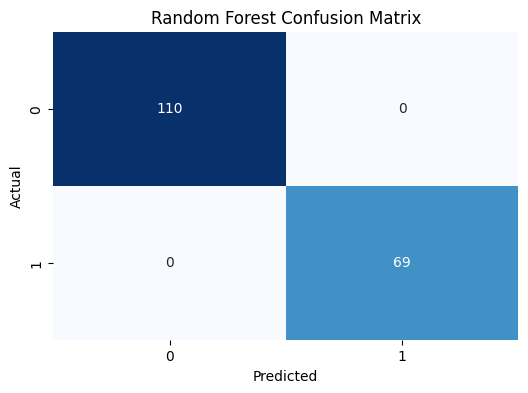

In [30]:
# 12. Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 13. Make predictions on X_test using the trained Random Forest model
rf_predictions = rf_model.predict(X_test)

# 14. Calculate the confusion matrix and accuracy score for the Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("\nRandom Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Accuracy:", rf_accuracy)

plot_confusion_matrix(rf_conf_matrix, 'Random Forest')


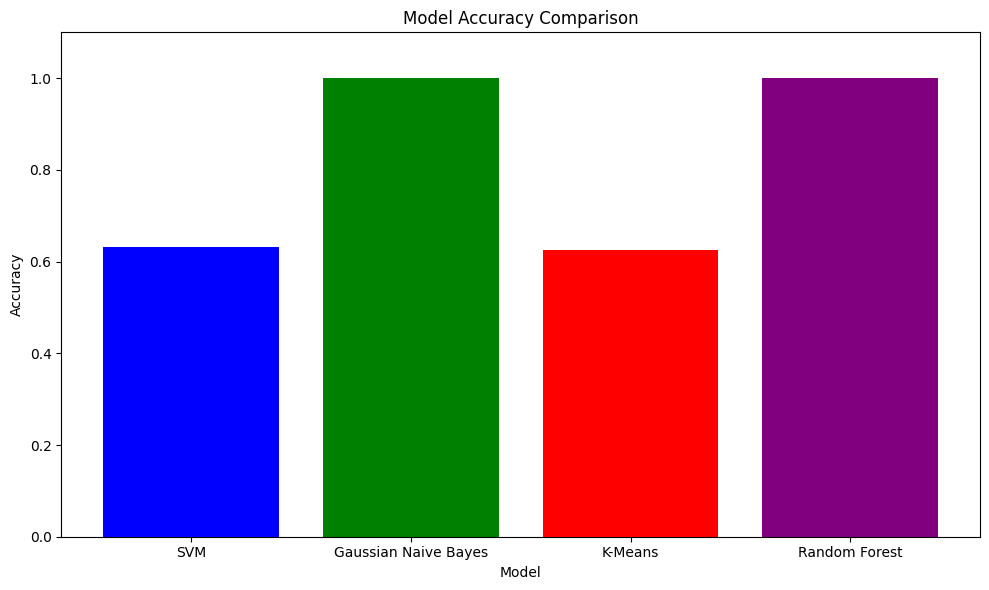

In [10]:
import matplotlib.pyplot as plt

# 1. Create a dictionary to store the accuracy scores for each model
model_accuracies = {
    'SVM': svm_accuracy,
    'Gaussian Naive Bayes': gnb_accuracy,
    'K-Means': kmeans_accuracy,
    'Random Forest': rf_accuracy
}

# 2. Create a bar plot to visualize the accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple'])

# 3. Add appropriate labels to the x and y axes
plt.xlabel("Model")
plt.ylabel("Accuracy")

# 4. Add a title to the plot
plt.title("Model Accuracy Comparison")

# 5. Display the plot
plt.ylim(0, 1.1) # Set y-axis limit from 0 to 1.1 for better visualization of accuracies
plt.tight_layout()
plt.show()

Model Evaluation Results
------------------------------
Support Vector Machine (SVM)
Confusion Matrix:
 [[95 15]
 [51 18]]
Accuracy: 0.6312849162011173
------------------------------
Gaussian Naïve Bayes
Confusion Matrix:
 [[110   0]
 [  0  69]]
Accuracy: 1.0
------------------------------
K-Means Clustering
Confusion Matrix:
 [[106   4]
 [ 63   6]]
Accuracy: 0.6256983240223464
------------------------------
Random Forest
Confusion Matrix:
 [[110   0]
 [  0  69]]
Accuracy: 1.0
------------------------------


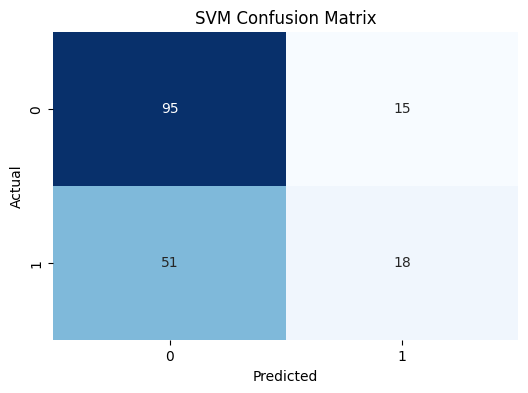

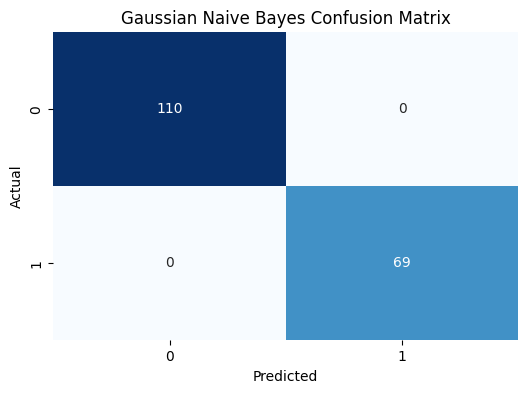

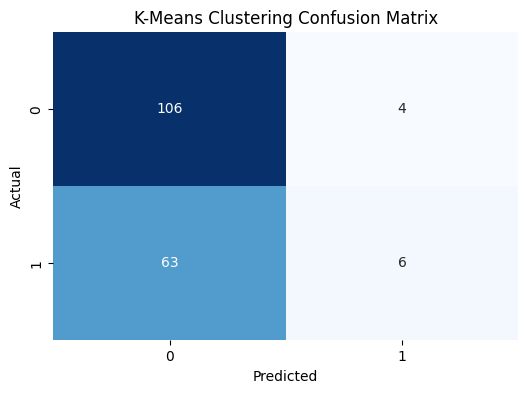

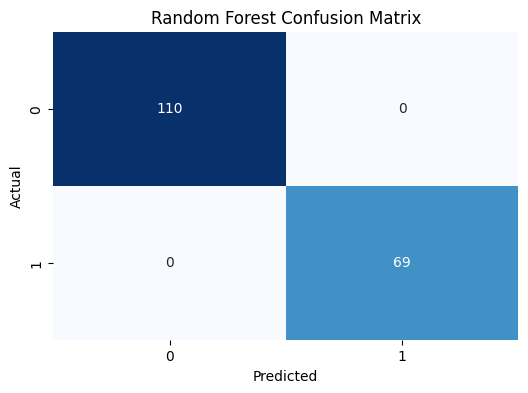

In [31]:
print("Model Evaluation Results")
print("-" * 30)

print("Support Vector Machine (SVM)")
print("Confusion Matrix:\n", svm_conf_matrix)
print("Accuracy:", svm_accuracy)
print("-" * 30)

print("Gaussian Naïve Bayes")
print("Confusion Matrix:\n", gnb_conf_matrix)
print("Accuracy:", gnb_accuracy)
print("-" * 30)

print("K-Means Clustering")
print("Confusion Matrix:\n", kmeans_conf_matrix)
print("Accuracy:", kmeans_accuracy)
print("-" * 30)

print("Random Forest")
print("Confusion Matrix:\n", rf_conf_matrix)
print("Accuracy:", rf_accuracy)
print("-" * 30)
plot_confusion_matrix(svm_conf_matrix, 'SVM')
plot_confusion_matrix(gnb_conf_matrix, 'Gaussian Naive Bayes')
plot_confusion_matrix(kmeans_conf_matrix, 'K-Means Clustering')
plot_confusion_matrix(rf_conf_matrix, 'Random Forest')
